# 1. Libraries

In [144]:
import pandas as pd
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,10.)})
sns.set_style("whitegrid")
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
from sklearn.model_selection import train_test_split as tts
import pandas as pd
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression as LinReg
from sklearn import metrics
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, confusion_matrix
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score as cvs
# Matplotlib inline para visualizar los gráficos de Matplotlib
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'
# Configuración para setear y que todas las fig de Seaborn salgan por defecto con este tamaño
# Se puede especificar el tamaño de cada figura
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# 2. Import la data

In [145]:
train = pd.read_csv("data/train_clean.csv")

In [146]:
train.head(1)

,id,carat,cut,color,clarity,depth,table,price
0,0,1.14,2,4,3,61.0,56.0,9013


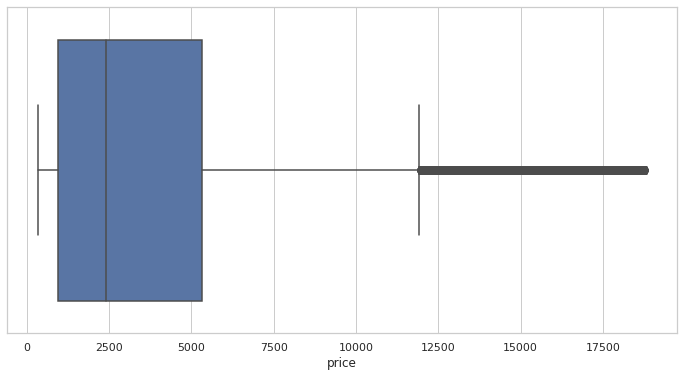

In [147]:
sns.boxplot(x="price", data=train);

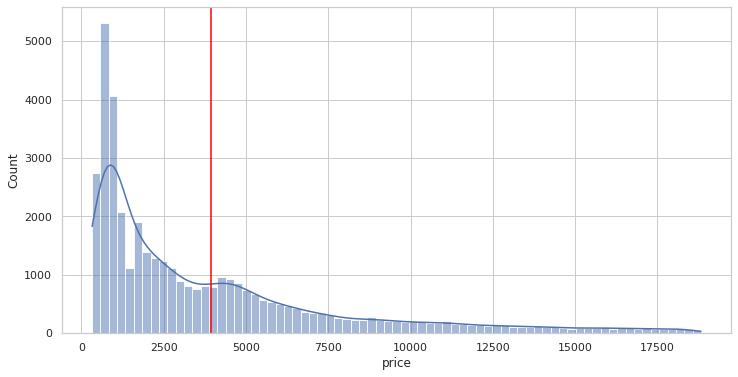

In [148]:
fig = sns.histplot(x=train.price, kde=True)
fig.axvline(x=train.price.mean(), color="red", label="media");

In [149]:
fig.axvline(x=train.price.mean(), color="red", label="media");

# 3. Probando modelos

In [150]:
y = train.price

In [151]:
X = train.drop(["price", "id"], axis=1)

In [152]:
X

,carat,cut,color,clarity,depth,table
0,1.14,2,4,3,61.0,56.0
1,0.76,2,5,5,62.7,57.0
2,0.84,2,4,4,61.4,56.0
3,1.55,2,5,4,62.0,57.0
4,0.30,2,4,7,61.9,57.0
...,...,...,...,...,...,...
40450,0.40,2,2,2,60.8,57.0
40451,0.52,2,7,7,61.6,55.0
40452,1.00,3,2,6,59.4,63.0
40453,0.57,3,2,4,62.9,56.0


In [153]:
X_train, X_test, y_train, y_test = tts(X,y, test_size=0.2)

In [154]:
models={
    'linnear': Ridge(),
    'Tree': DecisionTreeRegressor(),
    'Kneighbors': KNeighborsRegressor(),
    'grad': GradientBoostingRegressor(),
    'forest': RandomForestRegressor(),
}

In [155]:
#print('RMSE - Raiz Error Cuadratico Medio', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

In [156]:
for name, model in models.items():
    print("ENTRENANDO: ", name)
    model.fit(X_train, y_train)

ENTRENANDO:  linnear
ENTRENANDO:  Tree
ENTRENANDO:  Kneighbors
ENTRENANDO:  grad
ENTRENANDO:  forest


In [157]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{model} - RMSE - ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Ridge() - RMSE -  1247.0281099340266
DecisionTreeRegressor() - RMSE -  734.842036912687
KNeighborsRegressor() - RMSE -  1935.5656092074628
GradientBoostingRegressor() - RMSE -  635.2149743948081
RandomForestRegressor() - RMSE -  562.1253276152011


# 4. Elegimos Random Forest

In [158]:
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

RandomForestRegressor()

In [159]:
test = pd.read_csv("data/test.csv")

In [160]:
#vamos a limpiar el fichero test para poder hacer la predicción

In [161]:
dic_para_cut = {"Ideal": 2,
                "Premium": 1,
                "Very Good":3 ,
                "Good":4,
                "Fair":5 }

In [162]:
test.cut = test.cut.map(dic_para_cut)

In [163]:
dic_para_color = {"G":4,
                  "E":2,
                  "F":3,
                  "H":5,
                  "D":1,
                  "I":6,
                  "J":7}


In [164]:
test.color = test.color.map(dic_para_color)

In [165]:
dic_para_clarity = {"VVS2": 3,
                    "VS2": 5,
                    "VS1": 4,
                    "SI2": 7,
                    "SI1": 6,
                    "VVS1": 2,
                    "IF": 1 ,
                    "I1" : 8,
                   }

In [166]:
test.clarity = test.clarity.map(dic_para_clarity)

In [167]:
test.drop(["x","y","z", "id"], axis=1, inplace=True)

In [174]:
#hacemos la predicción

In [168]:
y_pred = forest.predict(test)

In [169]:
test["y_pred"] = y_pred #dejamos la predicción en los datos  

In [170]:
test.drop(["carat", "cut","color","clarity","depth","table"], axis=1, inplace=True) #preparamos el dataset para subir

In [171]:
test.head(2)

,y_pred
0,3301.48
1,3178.16


In [173]:
test.to_csv("data/MariaThelast_prueba.csv")